In [2]:
import sys, os
sys.path.append(os.path.abspath('..'))

from envs import BlackjackEnv, CARD_DECK, CARD_VALUES
import numpy as np
import seaborn as sns

In [ ]:
## Initialize 
n_decks = 1
env = BlackjackEnv()
Q = np.zeros((32 * 2 * 11, env.action_space.n))
gamma = 1
alpha = 0.1
epsilon = 1
epsilon_decay = 0.99
min_epsilon = 0.05

In [ ]:
## Functions
def update_q_table(state, action, reward, next_state): # state is a dict
    # extract and unpack obs
    a, b, c = list(state.values())
    na, nb, nc = list(next_state.values())

    # update table
    old_value = Q[(a, b, c), action]
    next_max = max(Q[(na, nb, nc)])
    Q[a, b, c, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

def epsilon_greedy(state):
    # implement the condition to explore
    if np.random.rand() < epsilon:
      	# choose a random action
        action = env.action_space.sample()
    else:
      	# choose the best action according to Q
        a, b, c = list(state.values())
        action = np.argmax(Q[a, b, c])
    return action

In [5]:
## Training loop
n_episodes = 1000000
episode_returns = []

for episode in range(n_episodes):
    state, info = env.reset()
    episode_reward = 0
    terminated = False

    while not terminated:
        action = epsilon_greedy(state)
        new_state, reward, terminated, truncated, info = env.step(action)
        update_q_table(state, action, reward, new_state)
        state = new_state

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    episode_returns.append(reward)

<Axes: >

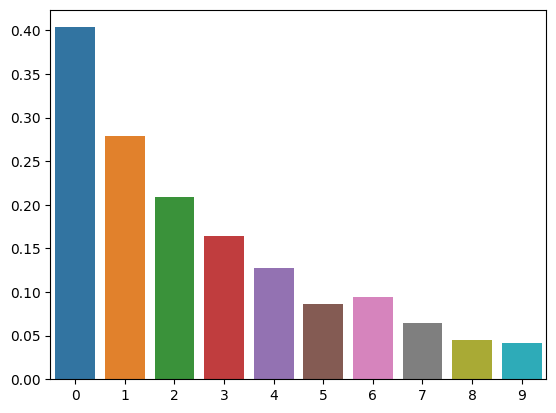

In [6]:
## Evaluation
n_groups = 10
n_episodes_per_group = n_episodes // n_groups
avg_rewards_over_time  = []
for i in range(1, n_groups + 1):
    average_reward = episode_returns[(i-1) * n_episodes_per_group : i * n_episodes_per_group]
    avg_rewards_over_time.append(average_reward)

sns.barplot(data = avg_rewards_over_time, errorbar = None)